# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Total requests: 1005
Anomalies detected: 11

Detected anomalies:
      response_time  request_id  anomaly
74       147.605098          75       -1
209      277.054630         210       -1
262      135.174653         263       -1
478      261.577616         479       -1
646      146.062267         647       -1
668      146.980604         669       -1
1000     400.000000        1001       -1
1001     420.000000        1002       -1
1002     450.000000        1003       -1
1003     470.000000        1004       -1
1004     480.000000        1005       -1


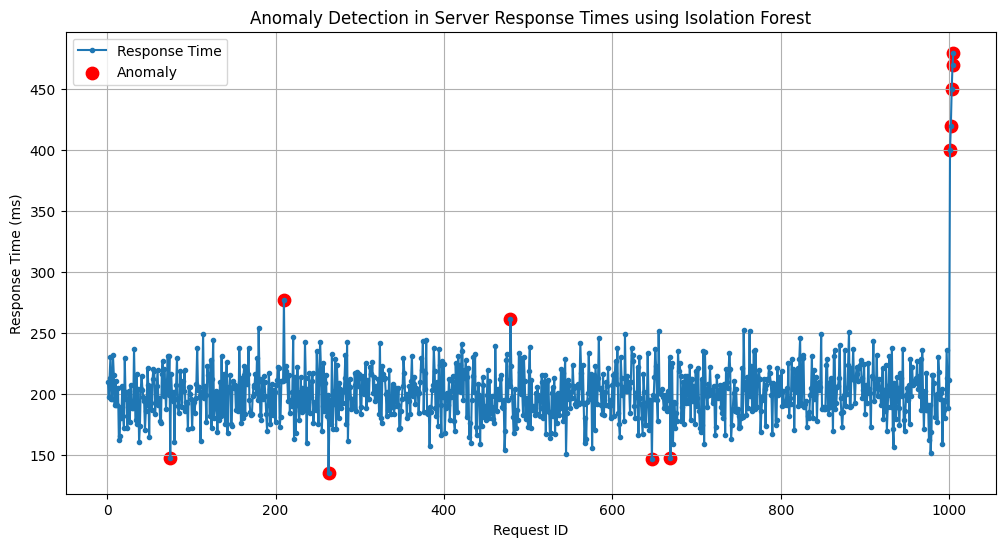

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate Server Response Time Dataset
np.random.seed(42)

# Generate 1000 normal response times (in milliseconds)
normal_times = np.random.normal(loc=200, scale=20, size=1000)

# Inject some anomalous response times
anomalies = np.array([400, 420, 450, 470, 480])
response_times = np.concatenate([normal_times, anomalies])

# Create a DataFrame
df = pd.DataFrame({'response_time': response_times})
df['request_id'] = range(1, len(df) + 1)

# Step 2: Train Isolation Forest Model
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['response_time']])

# Step 3: Detect Anomalies
# -1 = anomaly, 1 = normal
anomalies_df = df[df['anomaly'] == -1]

# Step 4: Evaluate Results
print("Total requests:", len(df))
print("Anomalies detected:", len(anomalies_df))
print("\nDetected anomalies:")
print(anomalies_df)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df['request_id'], df['response_time'], label='Response Time', marker='o', markersize=3)
plt.scatter(anomalies_df['request_id'], anomalies_df['response_time'], color='red', label='Anomaly', s=80)
plt.title('Anomaly Detection in Server Response Times using Isolation Forest')
plt.xlabel('Request ID')
plt.ylabel('Response Time (ms)')
plt.legend()
plt.grid(True)
plt.show()